# Predicting Wine Quality (based on physiochemical features)

The physiochemical features or columns are as follows:

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# from sklearn.metrics import plot_confusion_matrix
from scipy.stats import norm, boxcox
from collections import Counter
from scipy import stats

# warning library
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\jdgoe\Downloads\winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No missing data.

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

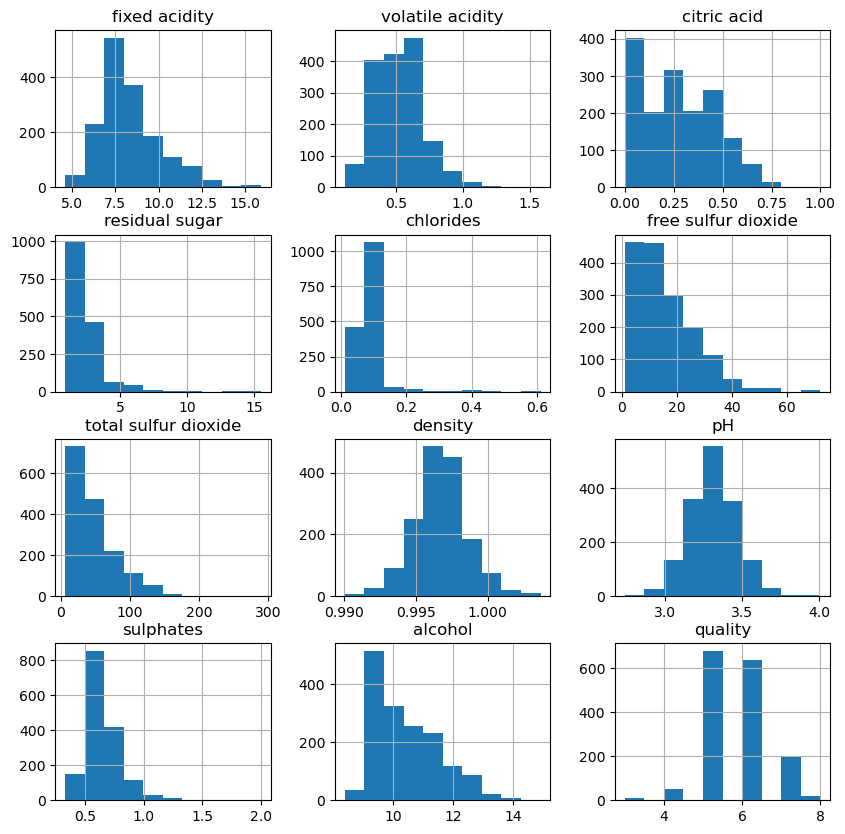

In [7]:
df.hist(figsize=(10,10))

Most of the features are unevenly distributed (exception: pH). I will run a boxcox tranformation to normalize the distribution. I may go back later and try the same thing with a log transformation to compare.


## Feature Engineering

Using Box Cox transformation to mitigate skewness

### Fixed Acidity

In [8]:
(mu, sigma) = norm.fit(df["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 8.31963727329581, sigma fixed acidity : 1.7405518001102729


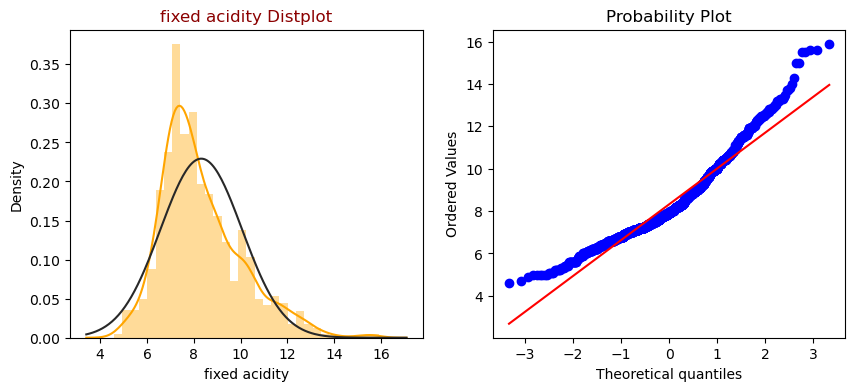

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["fixed acidity"], plot = plt)
plt.show()

mu fixed acidity : 1.124655731469057, sigma fixed acidity : 0.048378082803535


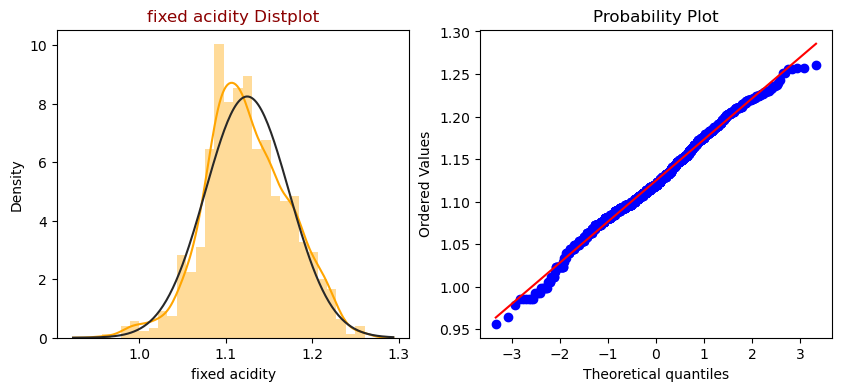

In [10]:
df["fixed acidity"], lam_fixed_acidity = boxcox(df["fixed acidity"])
(mu, sigma) = norm.fit(df["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["fixed acidity"], plot = plt)
plt.show()

The fit appears to be better after the transformation.

### Residual Sugar

mu residual sugar : 2.53880550343965, sigma residual sugar : 1.4094871124880495


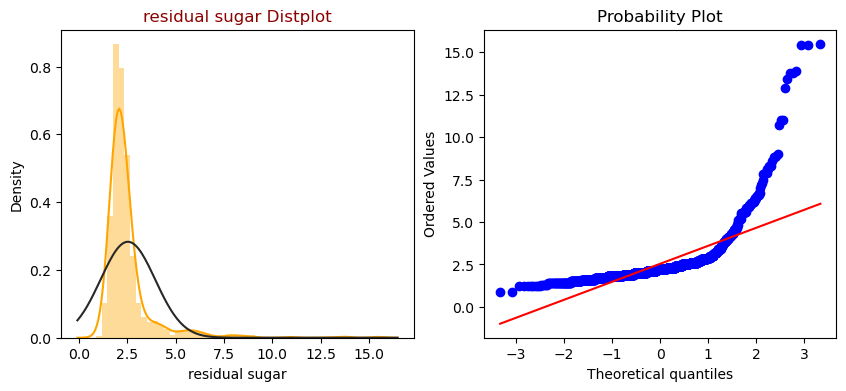

In [11]:
# Examine original
(mu, sigma) = norm.fit(df["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["residual sugar"], plot = plt)
plt.show()


mu residual sugar : 0.5135558435839319, sigma residual sugar : 0.11004598444169933


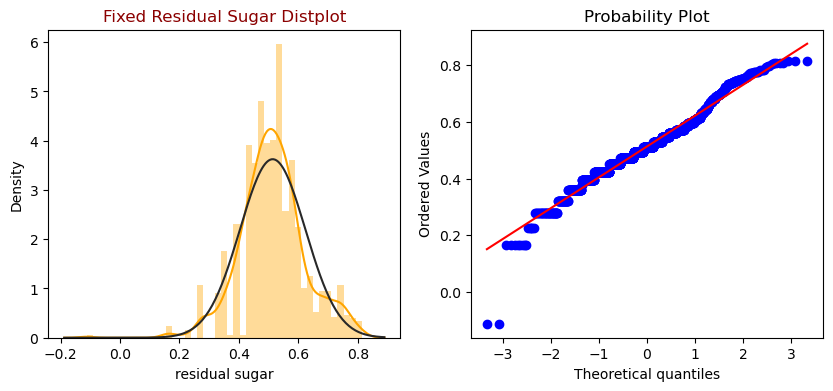

In [12]:
# Examine boxcox transformation
df["residual sugar"], lam_fixed_acidity = boxcox(df["residual sugar"])
(mu, sigma) = norm.fit(df["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["residual sugar"], fit=norm, color="orange")
plt.title("Fixed Residual Sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["residual sugar"], plot = plt)
plt.show()

Much better

### Volatile Acidity

mu volatile acidity : 0.5278205128205128, sigma volatile acidity : 0.17900370424469014


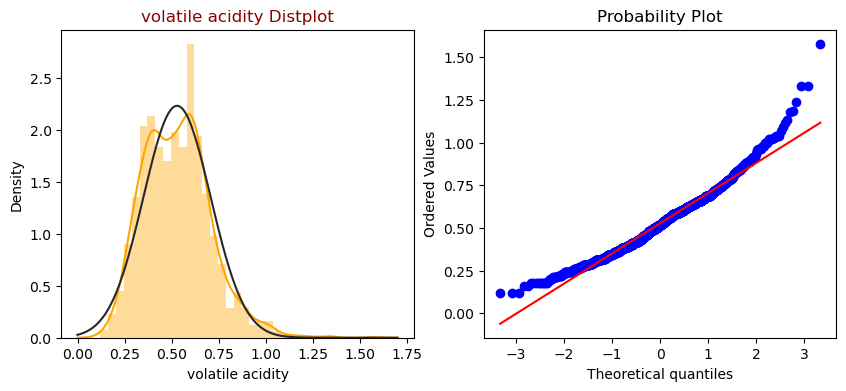

In [13]:
# Examine original
(mu, sigma) = norm.fit(df["volatile acidity"])
print("mu {} : {}, sigma {} : {}".format("volatile acidity", mu, "volatile acidity", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["volatile acidity"], fit=norm, color="orange")
plt.title("volatile acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["volatile acidity"], plot = plt)
plt.show()

mu volatile acidity : -0.5908766855819733, sigma volatile acidity : 0.26341681620291935


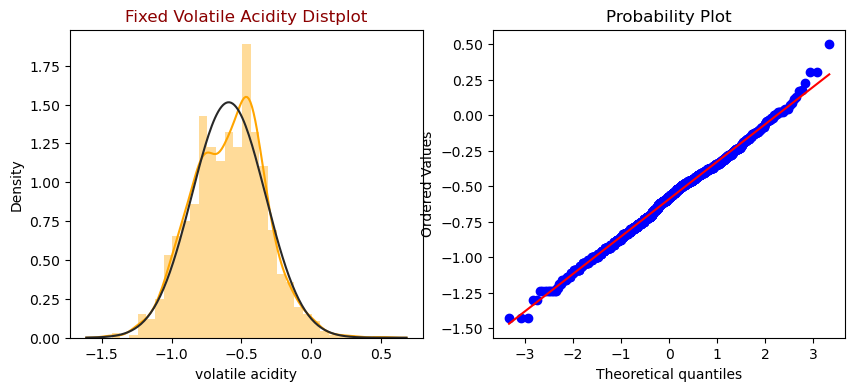

In [14]:
# Examine boxcox transformation
df["volatile acidity"], lam_fixed_acidity = boxcox(df["volatile acidity"])
(mu, sigma) = norm.fit(df["volatile acidity"])
print("mu {} : {}, sigma {} : {}".format("volatile acidity", mu, "volatile acidity", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["volatile acidity"], fit=norm, color="orange")
plt.title("Fixed Volatile Acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["volatile acidity"], plot = plt)
plt.show()

### Alcohol

mu alcohol : 10.422983114446529, sigma alcohol : 1.0653343003437483


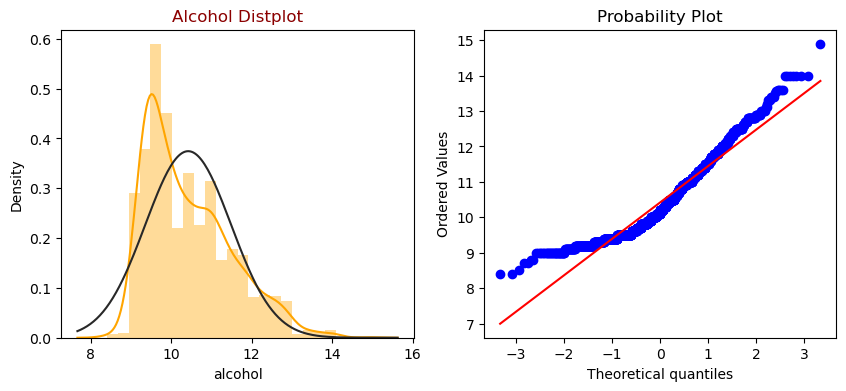

In [15]:
# Examine original
(mu, sigma) = norm.fit(df["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["alcohol"], fit=norm, color="orange")
plt.title("Alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["alcohol"], plot = plt)
plt.show()

mu alcohol : 0.3005237243397624, sigma alcohol : 3.922651387741175e-05


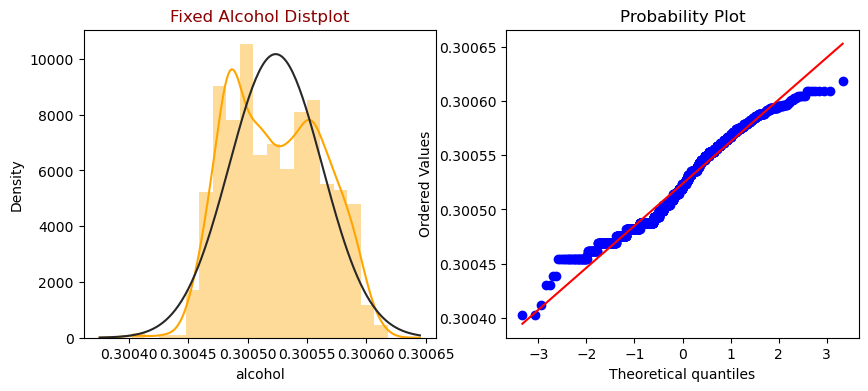

In [16]:
# Examine boxcox transformation
df["alcohol"], lam_fixed_alcohol = boxcox(df["alcohol"])
(mu, sigma) = norm.fit(df["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["alcohol"], fit=norm, color="orange")
plt.title("Fixed Alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["alcohol"], plot = plt)
plt.show()

### Total Sulfur Dioxide

mu total sulfur dioxide : 46.46779237023139, sigma total sulfur dioxide : 32.88503665178374


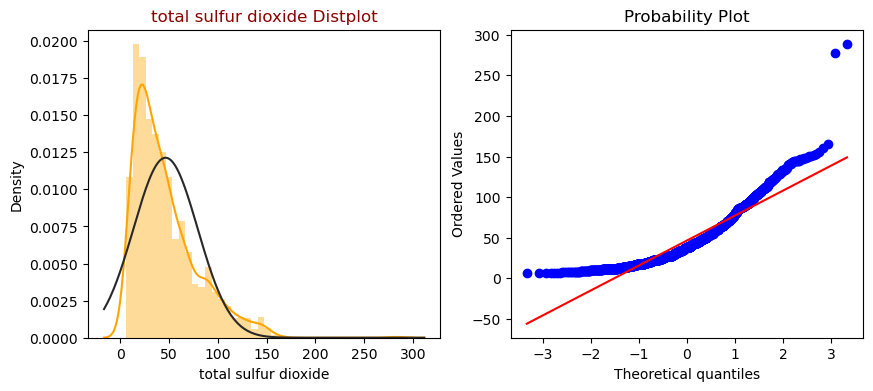

In [17]:
# Examine original
(mu, sigma) = norm.fit(df["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["total sulfur dioxide"], plot = plt)
plt.show()

mu total sulfur dioxide : 3.9657192644535324, sigma total sulfur dioxide : 0.8459104716754929


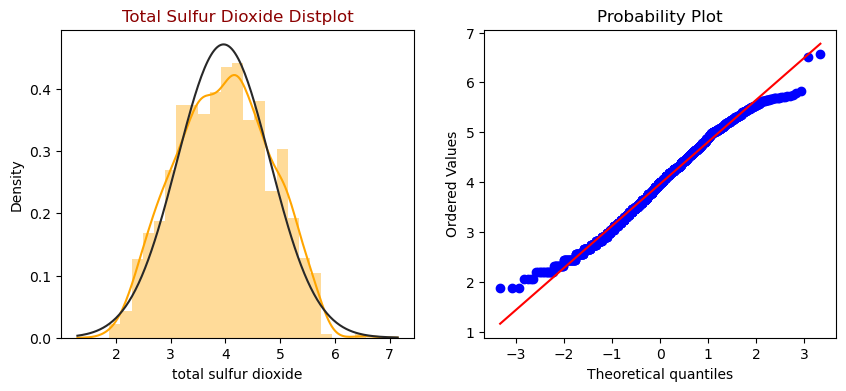

In [18]:
# Examine boxcox transformation
df["total sulfur dioxide"], lam_fixed_alcohol = boxcox(df["total sulfur dioxide"])
(mu, sigma) = norm.fit(df["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["total sulfur dioxide"], fit=norm, color="orange")
plt.title("Total Sulfur Dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["total sulfur dioxide"], plot = plt)
plt.show()

## Outlier Detection

Detect outliers in the data so we can extract them from the data

In [19]:
# Zscore outlier detection
def count_outliers(df, features):
    outlier_counts = []
    
    for c in features:  # Exclude the last column
        mean = df[c].mean()
        std = df[c].std()
        zscores = (df[c] - mean) / std
        num_outliers = ((zscores < -3) | (zscores > 3))
        outlier_counts.append(num_outliers)
    
    return outlier_counts


outlier_counts = count_outliers(df, df.columns[:-1])
print(outlier_counts)

[0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: fixed acidity, Length: 1599, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: volatile acidity, Length: 1599, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: citric acid, Length: 1599, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: residual sugar, Length: 1599, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: chlorides, Length: 1599, dtyp

No outliers using 3 stdevs as a threshold, let's consider using 1.5*IQR

In [20]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

In [21]:
print("number of outliers detected --> ",len(df.loc[detect_outliers(df,df.columns[:-1])]))
df.loc[detect_outliers(df,df.columns[:-1])]

number of outliers detected -->  70


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,0.956497,-0.575457,0.15,0.494302,0.054,8.0,4.649352,0.99340,3.90,0.56,0.300598,4
94,0.985731,0.019881,0.04,0.277689,0.045,41.0,4.983161,0.99380,3.75,0.48,0.300535,4
95,0.964194,-0.462056,0.17,0.530233,0.058,17.0,5.261323,0.99320,3.85,0.60,0.300595,6
442,1.257350,-0.351122,0.76,0.666360,0.100,6.0,4.144017,1.00320,2.95,0.68,0.300559,7
553,0.985731,0.039530,0.24,0.360736,0.050,32.0,5.136097,0.99340,3.74,0.62,0.300567,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1358,1.103306,-0.408751,0.17,0.731461,0.168,52.0,5.162102,0.99736,3.28,0.50,0.300488,5
1370,1.143543,-0.236524,0.51,0.394331,0.415,12.0,4.668228,0.99623,3.00,1.17,0.300469,5
1371,1.106811,-0.489510,0.56,0.624358,0.153,5.0,2.823886,0.99476,3.21,1.03,0.300569,6
1372,1.143543,-0.236524,0.51,0.394331,0.415,12.0,4.668228,0.99623,3.00,1.17,0.300469,5


In [22]:
# create new df without those outliers
df2 = df.drop(detect_outliers(df,df.columns[:-1]),axis = 0).reset_index(drop = True)

## Modeling

Now to test out different models. We will be trying the following:

KNeighborsClassifier

GradientBoostingCLassifier

SVC

XGBClassifier

KNeighborsClassifier

CatBoostClassifier

RandomForestClassifier

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import collections

In [24]:
# Make predictor variable a binomial with low quality(0) and high quality(1)
bins = (2, 6.5, 8)
labels = [0, 1]
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [25]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Considerably different counts, we will keep this in mind

### Train - Test Split

In [26]:
y = df.quality
x = df.drop(["quality"], axis = 1)

In [27]:
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 47)

In [28]:
# Smote to balance predictor outcomes
sm = SMOTE(random_state=47)
X_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)
print("Before smote --> ", collections.Counter(Y_train))
print("After smote --> ", collections.Counter(y_train_sm))

Before smote -->  Counter({0: 1107, 1: 172})
After smote -->  Counter({1: 1107, 0: 1107})


### Scale Data

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_train_sm = scaler.fit_transform(X_train_sm) 
X_test = scaler.transform(X_test) 

In [30]:
results = [] # To record model achievements

## KNNClassifier

Score :  0.8875
KNeighborsClassifier Acc :  0.8875


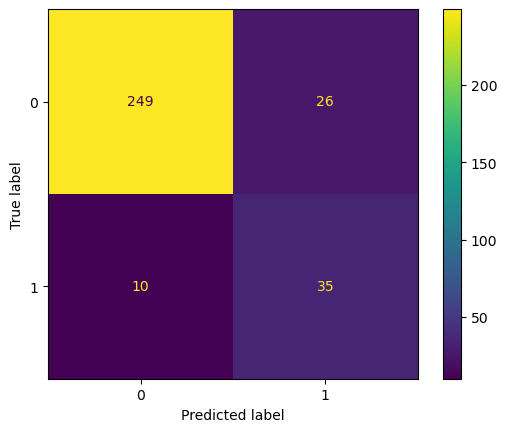

In [31]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_sm, y_train_sm)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("KNeighborsClassifier Acc : ", acc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)  

disp.plot()
plt.show()

In [32]:
print(" \t \t  KNN Classification Report")
print(classification_report(Y_test, y_pred))

 	 	  KNN Classification Report
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       275
           1       0.57      0.78      0.66        45

    accuracy                           0.89       320
   macro avg       0.77      0.84      0.80       320
weighted avg       0.91      0.89      0.89       320



## GradientBoostingClassifier

Score :  0.9
GradientBoostingClassifier Acc :  0.9


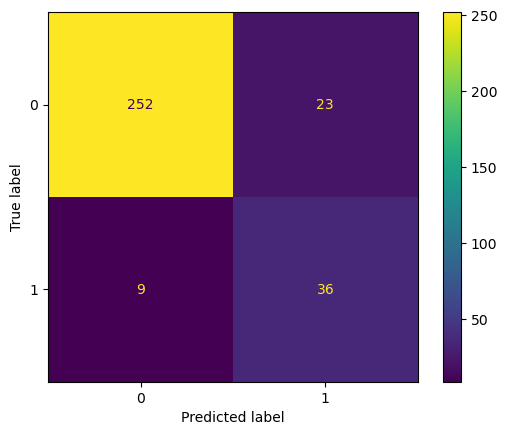

In [33]:
gbc = GradientBoostingClassifier(max_depth= 6, random_state=2)
gbc.fit(X_train_sm, y_train_sm)
y_pred_gbc = gbc.predict(X_test)
cm_aaa = confusion_matrix(Y_test, y_pred_gbc)
acc = accuracy_score(Y_test, y_pred_gbc)
score = gbc.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("GradientBoostingClassifier Acc : ", acc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_aaa)  

disp.plot()
plt.show()

In [34]:
print(" \t \t  GradientBoostingClassifier Classification Report")
print(classification_report(Y_test, y_pred_gbc))

 	 	  GradientBoostingClassifier Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       275
           1       0.61      0.80      0.69        45

    accuracy                           0.90       320
   macro avg       0.79      0.86      0.82       320
weighted avg       0.92      0.90      0.91       320



## SVC

Score :  0.8625
SVC Acc :  0.8625


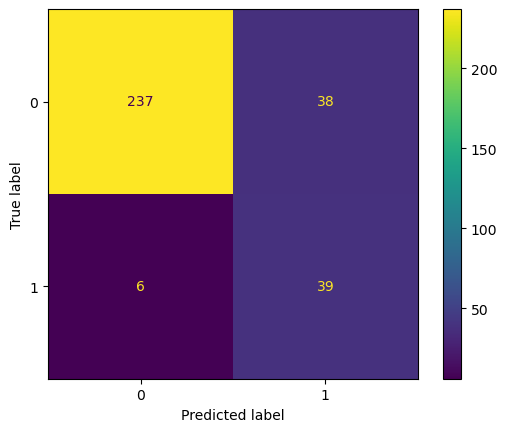

In [35]:
svc = SVC()
svc.fit(X_train_sm, y_train_sm)
pred_svc = svc.predict(X_test)

cm_svc = confusion_matrix(Y_test, pred_svc)
acc = accuracy_score(Y_test, pred_svc)
score = svc.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("SVC Acc : ", acc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)  

disp.plot()
plt.show()

In [36]:
print(" \t \t  SVC Classification Report")
print(classification_report(Y_test, pred_svc))

 	 	  SVC Classification Report
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       275
           1       0.51      0.87      0.64        45

    accuracy                           0.86       320
   macro avg       0.74      0.86      0.78       320
weighted avg       0.91      0.86      0.88       320



### XGBClassifier

Score :  0.875
XGBClassifier Acc :  0.875


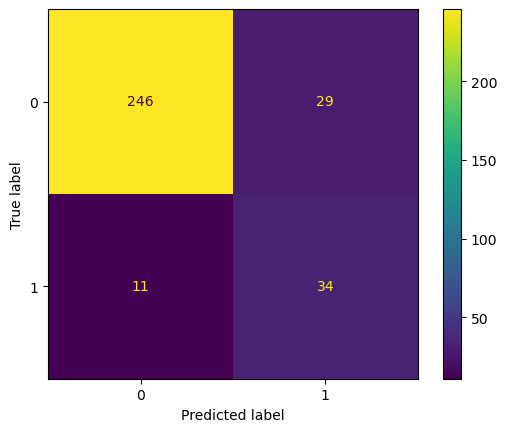

In [37]:
xgb = XGBClassifier()
xgb.fit(X_train_sm, y_train_sm)
pred_xgb = xgb.predict(X_test)

cm_aaa = confusion_matrix(Y_test, pred_xgb)
acc = accuracy_score(Y_test, pred_xgb)
score = xgb.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("XGBClassifier Acc : ", acc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_aaa)  

disp.plot()
plt.show()

In [38]:
print(" \t \t  XGBClassifier Classification Report")
print(classification_report(Y_test, pred_xgb))

 	 	  XGBClassifier Classification Report
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       275
           1       0.54      0.76      0.63        45

    accuracy                           0.88       320
   macro avg       0.75      0.83      0.78       320
weighted avg       0.90      0.88      0.88       320



### CatBoostClassifier

In [39]:
parameters = {  
                'depth'         : sp_randInt(4, 10),
                'learning_rate' : sp_randFloat(),
                'iterations'    : sp_randInt(10, 100)
             }

Score :  0.884375
Basic KNN Acc :  0.884375


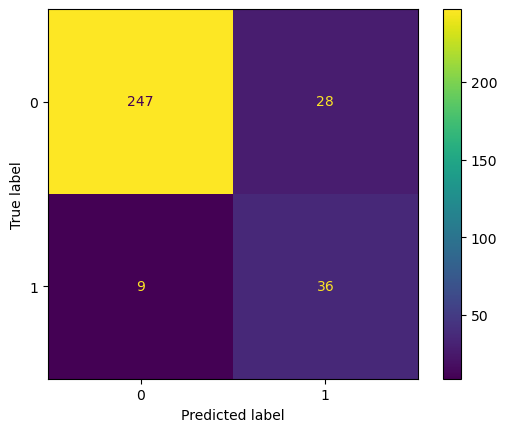

In [40]:
cat = CatBoostClassifier(iterations=1000, verbose = False, depth=8)
randm = RandomizedSearchCV(estimator=cat, param_distributions = parameters, 
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train_sm, y_train_sm)

pred_cat = randm.predict(X_test)

cm_cat = confusion_matrix(Y_test, pred_cat)
acc = accuracy_score(Y_test, pred_cat)
score = randm.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("Basic KNN Acc : ", acc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_cat)  

disp.plot()
plt.show()

In [41]:
print(" \t \t  CatBoostClassifier Classification Report")
print(classification_report(Y_test, pred_cat))

 	 	  CatBoostClassifier Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       275
           1       0.56      0.80      0.66        45

    accuracy                           0.88       320
   macro avg       0.76      0.85      0.80       320
weighted avg       0.91      0.88      0.89       320



### RandomForestClassifier

Score :  0.9
RandomForestClassifier Acc :  0.9


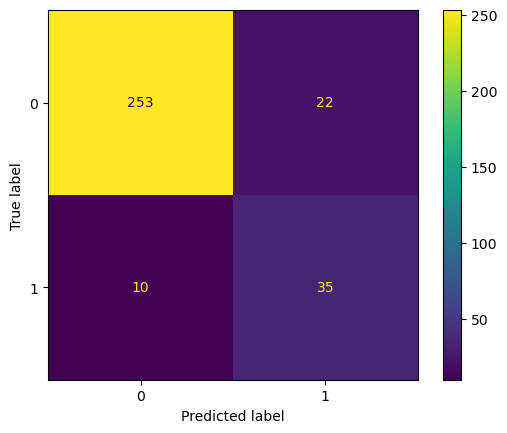

In [42]:
rf = RandomForestClassifier(max_depth=18, random_state=44, bootstrap = False)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_rf)

acc = accuracy_score(Y_test, y_pred_rf)
score = rf.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("RandomForestClassifier Acc : ", acc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)  

disp.plot()
plt.show()

In [43]:
print(" \t \t  RandomForestClassifier Classification Report")
print(classification_report(Y_test, y_pred_rf))

 	 	  RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       275
           1       0.61      0.78      0.69        45

    accuracy                           0.90       320
   macro avg       0.79      0.85      0.81       320
weighted avg       0.91      0.90      0.90       320



In [44]:
df_result = pd.DataFrame({"Score":results, "ML Models":["KNN","GradientBoostingClassifier",
             "SVC","XGBClassifier","CatBoostClassifier","RandomForestClassifier"]})

In [45]:
df_result.style.background_gradient("Greens")

,Score,ML Models
0,0.887500,KNN
1,0.900000,GradientBoostingClassifier
2,0.862500,SVC
3,0.875000,XGBClassifier
4,0.884375,CatBoostClassifier
5,0.900000,RandomForestClassifier


## Models Without Outliers

Now to try the models without outliers

In [50]:
# Make predictor variable a binomial with low quality(0) and high quality(1)
bins = (2, 6.5, 8)
labels = [0, 1]
df2['quality'] = pd.cut(x = df2['quality'], bins = bins, labels = labels)
y = df2.quality
x = df2.drop(["quality"], axis = 1)

In [51]:
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

In [52]:
sm = SMOTE(random_state=14)
X_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)

In [53]:
print("Before smote --> ", collections.Counter(Y_train))
print("After smote --> ", collections.Counter(y_train_sm))

Before smote -->  Counter({0: 1058, 1: 165})
After smote -->  Counter({0: 1058, 1: 1058})


In [54]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm) 
X_test = scaler.transform(X_test) 

In [55]:
results = []

In [56]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_sm, y_train_sm)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print(" \t \t  KNN Classification Report")
print(classification_report(Y_test, y_pred))

Score :  0.8758169934640523
 	 	  KNN Classification Report
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       263
           1       0.54      0.74      0.63        43

    accuracy                           0.88       306
   macro avg       0.75      0.82      0.78       306
weighted avg       0.90      0.88      0.88       306



In [57]:
gbc = GradientBoostingClassifier(max_depth= 6, random_state=2)
gbc.fit(X_train_sm, y_train_sm)
y_pred_gbc = gbc.predict(X_test)
cm_aaa = confusion_matrix(Y_test, y_pred_gbc)
acc = accuracy_score(Y_test, y_pred_gbc)
score = gbc.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print(" \t \t  GradientBoostingClassifier Classification Report")
print(classification_report(Y_test, y_pred_gbc))

Score :  0.8725490196078431
 	 	  GradientBoostingClassifier Classification Report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       263
           1       0.54      0.67      0.60        43

    accuracy                           0.87       306
   macro avg       0.74      0.79      0.76       306
weighted avg       0.89      0.87      0.88       306



In [58]:
svc = SVC()
svc.fit(X_train_sm, y_train_sm)
pred_svc = svc.predict(X_test)

cm_svc = confusion_matrix(Y_test, pred_svc)
acc = accuracy_score(Y_test, pred_svc)
score = svc.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print(" \t \t  SVC Classification Report")
print(classification_report(Y_test, pred_svc))

Score :  0.8300653594771242
 	 	  SVC Classification Report
              precision    recall  f1-score   support

           0       0.95      0.84      0.90       263
           1       0.44      0.74      0.55        43

    accuracy                           0.83       306
   macro avg       0.70      0.79      0.72       306
weighted avg       0.88      0.83      0.85       306



In [59]:
xgb = XGBClassifier()
xgb.fit(X_train_sm, y_train_sm)
pred_xgb = xgb.predict(X_test)

cm_aaa = confusion_matrix(Y_test, pred_xgb)
acc = accuracy_score(Y_test, pred_xgb)
score = xgb.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print(" \t \t  XGBClassifier Classification Report")
print(classification_report(Y_test, pred_xgb))

Score :  0.8856209150326797
 	 	  XGBClassifier Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       263
           1       0.57      0.72      0.64        43

    accuracy                           0.89       306
   macro avg       0.76      0.82      0.79       306
weighted avg       0.90      0.89      0.89       306



In [60]:
parameters = {  
                'depth'         : sp_randInt(4, 10),
                'learning_rate' : sp_randFloat(),
                'iterations'    : sp_randInt(10, 100)
             }

In [61]:
cat = CatBoostClassifier(iterations=1000, verbose = False, depth=8)
randm = RandomizedSearchCV(estimator=cat, param_distributions = parameters, 
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train_sm, y_train_sm)

pred_cat = randm.predict(X_test)

cm_cat = confusion_matrix(Y_test, pred_cat)
acc = accuracy_score(Y_test, pred_cat)
score = randm.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)

Score :  0.8823529411764706


In [62]:
print(" \t \t  CatBoostClassifier Classification Report")
print(classification_report(Y_test, pred_cat))

 	 	  CatBoostClassifier Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       263
           1       0.57      0.70      0.62        43

    accuracy                           0.88       306
   macro avg       0.76      0.81      0.78       306
weighted avg       0.89      0.88      0.89       306



In [63]:
rf = RandomForestClassifier(max_depth=18, random_state=44, bootstrap = False)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_rf)

acc = accuracy_score(Y_test, y_pred_rf)
score = rf.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print(" \t \t  RandomForestClassifier Classification Report")
print(classification_report(Y_test, y_pred_rf))

Score :  0.8921568627450981
 	 	  RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       263
           1       0.61      0.65      0.63        43

    accuracy                           0.89       306
   macro avg       0.78      0.79      0.78       306
weighted avg       0.90      0.89      0.89       306



In [64]:
df_result = pd.DataFrame({"Score":results, "ML Models":["KNN","GradientBoostingClassifier",
             "SVC","XGBClassifier","CatBoostClassifier","RandomForestClassifier"]})

In [65]:
df_result.style.background_gradient("Greens")

,Score,ML Models
0,0.875817,KNN
1,0.872549,GradientBoostingClassifier
2,0.830065,SVC
3,0.885621,XGBClassifier
4,0.882353,CatBoostClassifier
5,0.892157,RandomForestClassifier


RandomForestClassifier is close but is still less than the model using data with outliers. Thus outliers don't seem to change much if not make the accuracy better.

## Grid Search for RandomForestClassifier

In [70]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [71]:
forest = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = forest, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [72]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [78]:
rf = RandomForestClassifier(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 1,max_features='sqrt', random_state=42, bootstrap = False)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_rf)

acc = accuracy_score(Y_test, y_pred_rf)
score = rf.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)

Score :  0.8954248366013072


This has performed .3% better. Not much but it is something.|